# Test file for coding this task

## For init_task

In [1]:
import numpy as np
import random
from datetime import datetime
from pathlib import Path
from psychopy import visual, monitors, event
from psychopy.hardware import keyboard

from get_instruction_text import get_instruction_text
from get_correct_responses import get_correct_responses

c:\Users\nuttida-lab\miniconda3\envs\WM_task\lib\site-packages\psychopy\preferences\preferences.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
c:\Users\nuttida-lab\miniconda3\envs\WM_task\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
output_folder = Path('..') / 'patientData' / 'taskLogs'
output_folder.mkdir(parents=True, exist_ok=True)

sub_id = '0'
file_name = f"{sub_id}_Sub_{datetime.now().strftime('%m-%d-%Y_%H-%M-%S')}"
print(file_name)

0_Sub_11-15-2025_19-00-56


In [3]:
# Setting up task variables
n_blocks = 4
n_trials_per_block = 48
n_trials = n_trials_per_block * n_blocks

# Trial conditions: 1 = instruction first; 2 = instruction last (retrocue)
trial_conditions = (
    [2] * n_trials_per_block +
    [1] * n_trials_per_block +
    [2] * n_trials_per_block +
    [1] * n_trials_per_block
)

In [4]:
 # Relevant axis of each trial
category_names = ['Animals', 'Cars', 'Faces', 'Fruits']
axis_names = [
    ['Colorful', 'Count'],
    ['New', 'Colorful'],
    ['New', 'Identical'],
    ['Count', 'Identical']
]
category_and_axis = [category_names, axis_names]

# Which of the two axes belonging to each category will be used in each trial
trial_categories = [0, 1, 2, 3]
trial_axis = [0, 1]
anti_task = [0] # just the pro task
prompt_variant = [0, 1]
equivalent_variant_id = [0, 1]
action_variant = [0, 1]

In [ ]:
x1, x2, x3, x4, x5, x6 = np.meshgrid(
    trial_categories,
    trial_axis,
    anti_task,
    prompt_variant,
    equivalent_variant_id,
    action_variant,
    indexing='ij'  # 'ij' corresponds to ndgrid behavior in MATLAB
)

# Flatten and combine into a 2D array (each row is a combination)
result = np.column_stack([
    x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel(), x5.ravel(), x6.ravel()
])

# Number of combinations
n = result.shape[0]

# Compute replication factor
factor = int(n_trials / n)

# Repeat the combinations
result = np.tile(result, (factor, 1))

# Randomize trial order
result = np.random.permutation(result)

trial_categories = result[:, 0]
trial_axis_list = result[:, 1]
anti_task = result[:, 2]
prompt_variant = result[:, 3]
equivalent_variant_id = result[:, 4]
action_variant = result[:, 5]


In [ ]:
n

64

In [ ]:
result.shape

(192, 6)

In [6]:
# Determining which stimuli to use in each trial
stim_folder = Path('..') / 'stimuli' / 'Task_Stim_Version2'
trial_stims = [[None, None] for _ in range(n_trials)]
trial_pairs = np.zeros(n_trials, dtype=int)
stim1_position = np.full(n_trials, np.nan)
stim2_position = np.full(n_trials, np.nan)
break_trial = np.zeros(n_trials, dtype=int)

In [ ]:
pair_numbers = {}
for i in trial_axis:  # 2 axes
    for j in trial_categories:  # 4 categories
        pair_numbers[(i, j)] = list(range(6)) * 4  # 6 pairs (0-5) x 4 repetitions


In [13]:
# Filling identical cells with identical trials to be drawn from (without replacement)
identical_trials = {}
for i, axes in enumerate(axis_names):
    print(i, axes)
    if 'Identical' in axes:
        idx = [0] * (n_trials_per_block // 4) + [1] * (n_trials_per_block // 4)
        random.shuffle(idx)
        identical_trials[i] = idx

identical_trials_for_replacement = {k: v.copy() for k, v in identical_trials.items()}

0 ['Colorful', 'Count']
1 ['New', 'Colorful']
2 ['New', 'Identical']
3 ['Count', 'Identical']


In [12]:
identical_trials_for_replacement

{2: [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
 3: [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0]}

## checking data file

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle as pk


In [25]:
file_name = 'C:\\Users\\nuttida-lab\\Documents\\renee\\WMVerbalInstructionTask\\patientData\\taskLogs\\0_Sub_11-25-2025_22-41-13.pkl'

with open(file_name, 'rb') as f:
    data = pk.load(f)

data.keys()

dict_keys(['task_struct', 'disp_struct'])

In [26]:
data['task_struct'].keys()

dict_keys(['sub_id', 'eye_link_mode', 'use_cedrus', 'debug', 'output_folder', 'file_name', 'n_blocks', 'n_trials_per_block', 'n_trials', 'trial_conditions', 'category_names', 'axis_names', 'category_and_axis', 'trial_categories', 'trial_axis', 'anti_task', 'prompt_variant', 'equivalent_variant_id', 'response_variant', 'trial_instructions', 'response_instructions', 'prompt_types', 'stim_folder', 'trial_stims', 'trial_pairs', 'n_pairs', 'n_repetitions', 'stim1_position', 'stim2_position', 'break_trial', 'left_text', 'right_text', 'fixation_time', 'instruction_time_min', 'instruction_time_max', 'stim1_time', 'ISI', 'stim2_time', 'response_instruction_time', 'response_time_max', 'text_holdout_time', 'ITI', 'instruction_time', 'response_time', 'slider_positions', 'trial_time', 'resp_key', 'complete_flag', 'correct_responses', 'handle', 'left_key', 'right_key', 'confirm_key', 'up_key', 'down_key', 'escape_key', 'pause_key', 'continue_key', 'parallel_port', 'trial_struct_cell'])

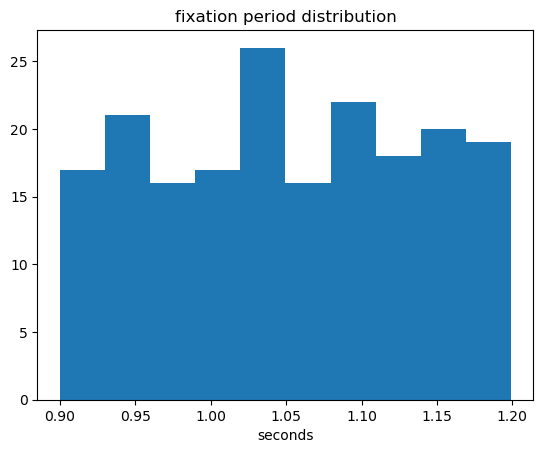

In [49]:
plt.hist(data['task_struct']['fixation_time'])
plt.xlabel('seconds')
plt.title('fixation period distribution');

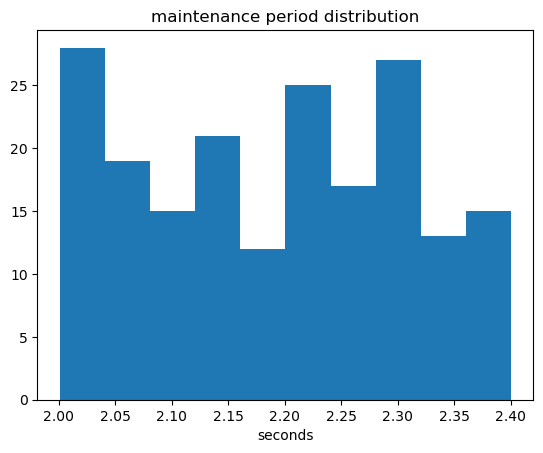

In [48]:
plt.hist(data['task_struct']['ISI'])
plt.xlabel('seconds')
plt.title('maintenance period distribution');

6


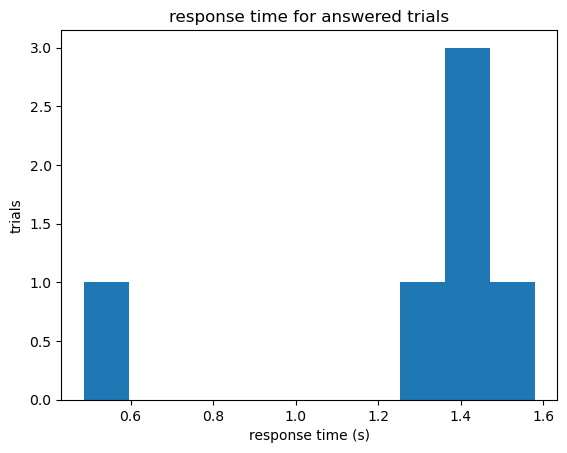

In [47]:
answered = np.where(~np.isnan(data['task_struct']['response_time']))[0]
print(len(answered))
plt.hist(data['task_struct']['response_time'][answered])
plt.ylabel('trials')
plt.xlabel('response time (s)')
plt.title('response time for answered trials');

In [33]:
data['task_struct']['resp_key']

array([ 2.,  2.,  2.,  2.,  1.,  2., nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
# number correct out of the ones answered
np.sum(data['task_struct']['resp_key'][answered] == data['task_struct']['correct_responses'][answered])

6

Text(0.5, 1.0, 'slider position over time')

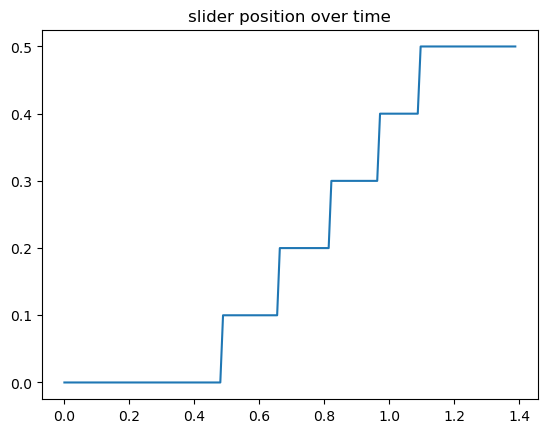

In [45]:
slider_info = data['task_struct']['slider_positions'][1]
plt.plot(slider_info['time'], slider_info['pos'])
plt.title('slider position over time')